# Projeto 2 - Ciência dos Dados


Nome: Beatriz Bobrow Bozzo
    
Nome: Mariana Cézar

Nome: Rodrigo Nigri Griner

Nome: Thais Sztamfater Groberman

___
## Contextualização



Doenças cardiovasculares são distúrbios do coração e de vasos sanguíneos. Esses incluem ateques cardíacos, derrames e insuficiência cardíaca, entre outras. Dessa forma, ao todo, doenças cardiovasculares representam cerca de 17 milhões de morte no mundo anualmente.

Nesse estudo, será considerado pacientes que possuem insuficiência cardíaca, ou seja, quando o coração não possui força suficiente para bombear todo sangue necessário para o corpo. Essa doença está geralmente atrelada à condições como anemia, dibetes, hipertensão, entre outras.

O dataset utilizado no projeto contém o prontuário de 299 pacientes e apresenta as seguintes informações:
- age: Idade do paciente (anos)
- anaemia: Ausência de glóbulos vermelhos ou hemoglobina
- high blood pressure: Paciente tem hipertensão
- creatinine phosphokinase (CPK): quantidade de enzima CPK no sangue (mcg/L)
- diabetes: Paciente tem diabetes
- ejection fraction: Porcentagem de sangue saindo do coração a cada sístole
- platelets: Quantidade de plaquetas no sangue (kiloplatelets/mL)
- sex: Mulher ou homem
- serum creatinine:  Quantidade de creatinina no sangue (mg/dL)
- serum sodium: Quantidade de sodio no sangue (mEq/L)
- smoking: Paciente fuma
- time: Tempo em que o paciente foi estudado (dias)
- death event: Paciente morreu durante o tempo em que participou do estudo

Analisando essas informações seria possível observar padrões e auxiliar os médicos a preverem se o paciente irá a óbito durante o tempo de estudo do paciente. Dessa forma, os features serão as informações do prontuário enquanto que o target será se o paciente faleceu.

Como o target do nosso projeto é uma variável qualitativa, será utilizado o método de **Classificadores**.



___
## Lendo o Dataset

#### Importando as bibliotecas necessárias

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np
import os
from IPython.display import display

##### Verificando o diretório em que o arquivo está

In [2]:
filename = 'heart_failure_clinical_records_dataset.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo heart_failure_clinical_records_dataset.xlsx!


##### Lendo o dataset

In [3]:
dados = pd.read_excel(filename)
dados

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Sendo:
- age: Idade do paciente (anos)
- anaemia: Ausência de glóbulos vermelhos ou hemoglobina (0 = Não; 1 = Sim)
- high blood pressure: Paciente tem hipertensão (0 = Não; 1 = Sim)
- creatinine phosphokinase (CPK): quantidade de enzima CPK no sangue (mcg/L)
- diabetes: Paciente tem diabetes (0 = Não; 1 = Sim)
- ejection fraction: Porcentagem de sangue saindo do coração a cada sístole
- platelets: Quantidade de plaquetas no sangue (kiloplatelets/mL)
- sex: Mulher ou homem (0 = Mulher; 1 = Homem)
- serum creatinine:  Quantidade de creatinina no sangue (mg/dL)
- serum sodium: Quantidade de sodio no sangue (mEq/L)
- smoking: Paciente fuma (0 = Não; 1 = Sim)
- time: Tempo em que o paciente foi estudado (dias)
- death event: Paciente morreu durante o tempo em que participou do estudo (0 = Não; 1 = Sim)

In [4]:
# Definindo os tipos das variáveis de cada coluna
dados.age = dados.age.astype('int')
dados.anaemia = dados.anaemia.astype('category')
dados.creatinine_phosphokinase = dados.creatinine_phosphokinase.astype('int')
dados.diabetes = dados.diabetes.astype('category')
dados.ejection_fraction = dados.ejection_fraction.astype('int')
dados.high_blood_pressure = dados.high_blood_pressure.astype('category')
dados.platelets = dados.platelets.astype('float')
dados.serum_creatinine = dados.serum_creatinine.astype('float')
dados.serum_sodium = dados.serum_sodium.astype('int')
dados.sex = dados.sex.astype('category')
dados.smoking = dados.smoking.astype('category')
dados.time = dados.time.astype('int')
dados.DEATH_EVENT = dados.DEATH_EVENT.astype('category')

# Substrituindo os códigos numéricos por seus significados
dados.anaemia.cat.categories = (['Não', 'Sim'])
dados.diabetes.cat.categories  = (['Não', 'Sim'])
dados.high_blood_pressure.cat.categories  = (['Não', 'Sim'])
dados.sex.cat.categories  = (['Mulher', 'Homem'])
dados.smoking.cat.categories  = (['Não', 'Sim'])
dados.DEATH_EVENT.cat.categories  = (['Não', 'Sim'])

dados.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62,Não,61,Sim,38,Sim,155000.0,1.1,143,Homem,Sim,270,Não
295,55,Não,1820,Não,38,Não,270000.0,1.2,139,Mulher,Não,271,Não
296,45,Não,2060,Sim,60,Não,742000.0,0.8,138,Mulher,Não,278,Não
297,45,Não,2413,Não,38,Não,140000.0,1.4,140,Homem,Sim,280,Não
298,50,Não,196,Não,45,Não,395000.0,1.6,136,Homem,Sim,285,Não


In [5]:
# Verificando se há colunas sem dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null int32
anaemia                     299 non-null category
creatinine_phosphokinase    299 non-null int32
diabetes                    299 non-null category
ejection_fraction           299 non-null int32
high_blood_pressure         299 non-null category
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int32
sex                         299 non-null category
smoking                     299 non-null category
time                        299 non-null int32
DEATH_EVENT                 299 non-null category
dtypes: category(6), float64(2), int32(5)
memory usage: 13.0 KB


___
## Análise exploratória

Como as variáveis são tanto numéricas quanto categóricas, é necessário analisá-las separadamente.

### Análise numérica

In [6]:
# medidas resumo
medidas_resumo = dados.describe()
medidas_resumo

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.782609,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.913963,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,50.500000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [7]:
sobrevivente = dados['DEATH_EVENT'] == 'Não'
nao_sobrevivente = dados['DEATH_EVENT'] == 'Sim'

In [8]:
# AGE
age_sobrevivente = dados.loc[sobrevivente, ['age']]
age_nao_sobrevivente = dados.loc[nao_sobrevivente, ['age']]

In [9]:
dados.age.describe()

count    299.000000
mean      60.782609
std       11.913963
min       40.000000
25%       50.500000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

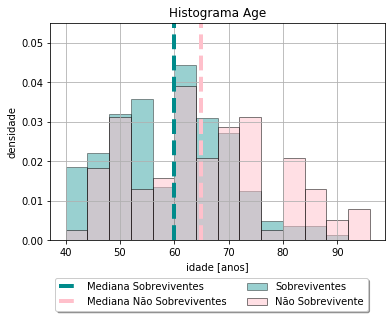

In [10]:
faixa_age = np.linspace(40, 96, 15)

plt.hist(age_sobrevivente['age'], bins = faixa_age, edgecolor = 'k', density = True, color = 'darkcyan', alpha = 0.4, label = 'Sobreviventes')
plt.hist(age_nao_sobrevivente['age'], bins = faixa_age, edgecolor = 'k', density = True, color = 'pink', alpha = 0.5, label = 'Não Sobrevivente')
plt.axvline(x = age_sobrevivente['age'].median(), color = "darkcyan", linewidth = 4, linestyle = '--', label = "Mediana Sobreviventes")
plt.axvline(x = age_nao_sobrevivente['age'].median(), color = "pink", linewidth = 4, linestyle = '--', label = "Mediana Não Sobreviventes")
plt.title('Histograma Age')
plt.ylabel('densidade')
plt.ylim(0, 0.055)
plt.xlabel('idade [anos]')
plt.legend(loc = 'upper left', bbox_to_anchor = (0, -0.15), shadow = True, ncol = 2)
plt.grid()
plt.show()

Observando os gráficos, percebe-se que pacientes até aproximadamente 70 anos, possuem uma taxa de sobrevivencia próxima ou superior à taxa de não sobrevivencia. E a partir de 70, observa-se uma queda na taxa de sobrevivência, e dessa forma, a taxa de não sobrevivência se torna maior.

In [11]:
# CREATININE_PHOSPHOKINASE
cpk_sobrevivente = dados.loc[sobrevivente, ['creatinine_phosphokinase']]
cpk_nao_sobrevivente = dados.loc[nao_sobrevivente, ['creatinine_phosphokinase']]

In [12]:
dados.creatinine_phosphokinase.describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

Text(0.5, 0, 'nível de cpk [mcg/L]')

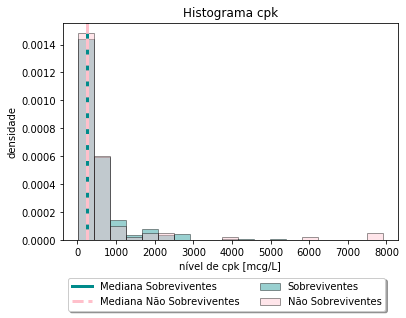

In [13]:
faixa_cpk = np.linspace(20, 7900, 20)


plt.hist(cpk_sobrevivente['creatinine_phosphokinase'], bins = faixa_cpk, edgecolor = 'k', density = True, color = 'darkcyan', alpha = 0.4, label = 'Sobreviventes')
plt.hist(cpk_nao_sobrevivente['creatinine_phosphokinase'], bins = faixa_cpk, edgecolor = 'k', density = True, color = 'pink', alpha = 0.4, label = 'Não Sobreviventes')
plt.axvline(x = cpk_sobrevivente['creatinine_phosphokinase'].median(), color = "darkcyan", linewidth = 3, linestyle = '-', label = "Mediana Sobreviventes")
plt.axvline(x = cpk_nao_sobrevivente['creatinine_phosphokinase'].median(), color = "pink", linewidth = 3, linestyle = '--', label = "Mediana Não Sobreviventes")
plt.title('Histograma cpk')
plt.legend(loc = 'upper left', bbox_to_anchor = (0, -0.15), shadow = True, ncol = 2)
plt.ylabel('densidade')
plt.xlabel('nível de cpk [mcg/L]')

Os resultados do gráfico acima estão próximos, o que dificuta a compreensão. Dessa forma, iremos plotar um novo gráfico com apenas os dados do 3o quartil.

Text(0.5, 0, 'nível de cpk [mcg/L]')

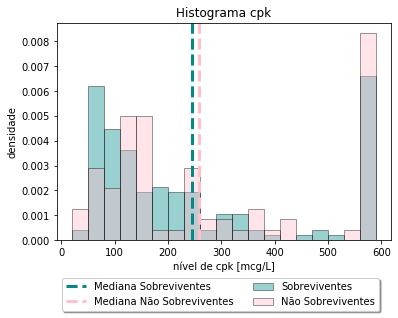

In [14]:
faixa_cpk = np.linspace(20, 590, 20)

plt.hist(cpk_sobrevivente['creatinine_phosphokinase'], bins = faixa_cpk, edgecolor = 'k', density = True, color = 'darkcyan', alpha = 0.4, label = 'Sobreviventes')
plt.hist(cpk_nao_sobrevivente['creatinine_phosphokinase'], bins = faixa_cpk, edgecolor = 'k', density = True, color = 'pink', alpha = 0.4, label = 'Não Sobreviventes')
plt.axvline(x = cpk_sobrevivente['creatinine_phosphokinase'].median(), color = "darkcyan", linewidth = 3, linestyle = '--', label = "Mediana Sobreviventes")
plt.axvline(x = cpk_nao_sobrevivente['creatinine_phosphokinase'].median(), color = "pink", linewidth = 3, linestyle = '--', label = "Mediana Não Sobreviventes")
plt.title('Histograma cpk')
plt.legend(loc = 'upper left', bbox_to_anchor = (0, -0.15), shadow = True, ncol = 2)
plt.ylabel('densidade')
plt.xlabel('nível de cpk [mcg/L]')

Observando o gráfico, percebe-se que o cpk possuí níveis próximos tanto nos pacieentes que sobreviveram e que não sobreviveram. Assim concluímos, que o nível da enzima cpk no sangue dos paciêntes, não afeta diretamente a taxa de sobrevivência.

In [15]:
# EJECTION FRACTION
ef_sobrevivente = dados.loc[sobrevivente, ['ejection_fraction']]
ef_nao_sobrevivente = dados.loc[nao_sobrevivente, ['ejection_fraction']]

In [16]:
dados.ejection_fraction.describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

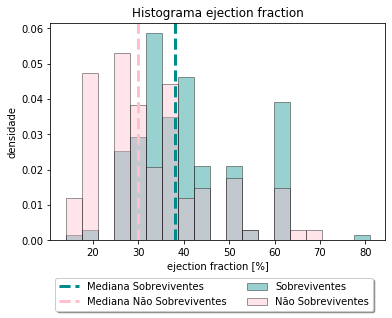

In [17]:
faixa_ef = np.linspace(14, 81, 20)

plt.hist(ef_sobrevivente['ejection_fraction'], bins = faixa_ef, edgecolor = 'k', density = True, color = 'darkcyan', alpha = 0.4, label = 'Sobreviventes')
plt.hist(ef_nao_sobrevivente['ejection_fraction'], bins = faixa_ef, edgecolor = 'k', density = True, color = 'pink', alpha = 0.4, label = 'Não Sobreviventes')
plt.axvline(x = ef_sobrevivente['ejection_fraction'].median(), color = "darkcyan", linewidth = 3, linestyle = '--', label = "Mediana Sobreviventes")
plt.axvline(x = ef_nao_sobrevivente['ejection_fraction'].median(), color = "pink", linewidth = 3, linestyle = '--', label = "Mediana Não Sobreviventes")
plt.title('ef sobreviventes')
plt.ylabel('densidade')
plt.xlabel('ejection fraction [%]')
plt.title('Histograma ejection fraction')
plt.legend(loc = 'upper left', bbox_to_anchor = (0, -0.15), shadow = True, ncol = 2)
plt.show()

Pelo gáfico, infere-se que a porcentagem de sangue saindo do coração a cada sístole (ejection fraction) no intervalo de 0 a 30%, a taxa de sobrevivência é inferior à taxa de não sobreviência. Quando os valores são maiores do que 30%, a taxa de sobrevivência e não sobrevivência são mais próximas.

In [18]:
# PLATELETS
platelets_sobrevivente = dados.loc[sobrevivente, ['platelets']]
platelets_nao_sobrevivente = dados.loc[nao_sobrevivente, ['platelets']]

In [19]:
dados.platelets.describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

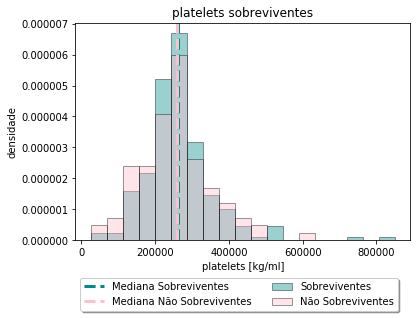

In [20]:
faixa_platelets = np.linspace(25100, 850001, 20)

plt.hist(platelets_sobrevivente['platelets'], bins = faixa_platelets, edgecolor = 'k', density = True, color = 'darkcyan', alpha = 0.4, label = 'Sobreviventes')
plt.hist(platelets_nao_sobrevivente['platelets'], bins = faixa_platelets, edgecolor = 'k', density = True, color = 'pink', alpha = 0.4, label = 'Não Sobreviventes')
plt.axvline(x = platelets_sobrevivente['platelets'].median(), color = "darkcyan", linewidth = 3, linestyle = '--', label = "Mediana Sobreviventes")
plt.axvline(x = platelets_nao_sobrevivente['platelets'].median(), color = "pink", linewidth = 3, linestyle = '--', label = "Mediana Não Sobreviventes")
plt.title('platelets sobreviventes')
plt.ylabel('densidade')
plt.xlabel('platelets [kg/ml]')
plt.legend(loc = 'upper left', bbox_to_anchor = (0, -0.15), shadow = True, ncol = 2)
plt.show()

Observando  o gráfico, percebe-se que nas extremidades do gráfico, ou seja, nos níveis mais baixos e altos de plaquetas, as taxas de sobrevivência e de não sobrevivência são similares. Já nos valores intermediários, existe uma diferença maior.


In [21]:
# SERUM CREATININE
sc_sobrevivente = dados.loc[sobrevivente, ['serum_creatinine']]
sc_nao_sobrevivente = dados.loc[nao_sobrevivente, ['serum_creatinine']]

In [22]:
dados.serum_creatinine.describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

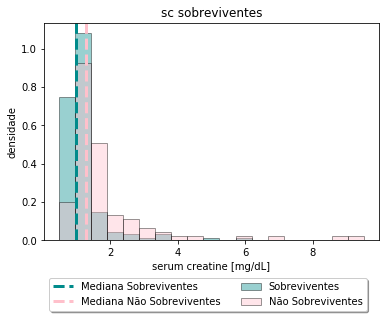

In [23]:
faixa_sc = np.linspace(0.5, 9.5, 20)

plt.hist(sc_sobrevivente['serum_creatinine'], bins = faixa_sc, edgecolor = 'k', density = True,  color = 'darkcyan', alpha = 0.4, label = 'Sobreviventes')
plt.hist(sc_nao_sobrevivente['serum_creatinine'], bins = faixa_sc, edgecolor = 'k' , density = True, color = 'pink', alpha = 0.4, label = 'Não Sobreviventes')
plt.axvline(x = sc_sobrevivente['serum_creatinine'].median(), color = "darkcyan", linewidth = 3, linestyle = '--', label = "Mediana Sobreviventes")
plt.axvline(x = sc_nao_sobrevivente['serum_creatinine'].median(), color = "pink", linewidth = 3, linestyle = '--', label = "Mediana Não Sobreviventes")
plt.title('sc sobreviventes')
plt.ylabel('densidade')
plt.xlabel('serum creatine [mg/dL]')
plt.legend(loc = 'upper left', bbox_to_anchor = (0, -0.15), shadow = True, ncol = 2)
plt.show()

Do gráfico, observa-se que quanto menos serum creatine no sangue, maior é a taxa de sobrevivência.

In [24]:
# TIME
time_sobrevivente = dados.loc[sobrevivente, ['time']]
time_nao_sobrevivente = dados.loc[nao_sobrevivente, ['time']]

In [25]:
dados.time.describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

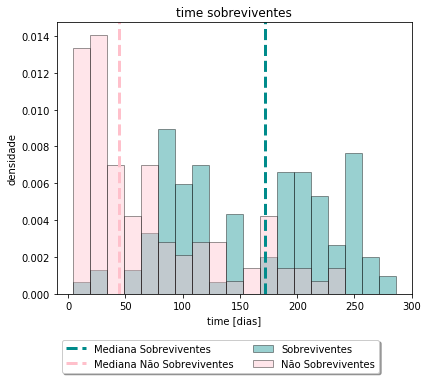

In [26]:
faixa_sc = np.linspace(4, 286, 20)

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.hist(time_sobrevivente['time'], bins = faixa_sc, edgecolor = 'k', density = True, color = 'darkcyan', alpha = 0.4, label = 'Sobreviventes')
plt.hist(time_nao_sobrevivente['time'], bins = faixa_sc, edgecolor = 'k', density = True, color = 'pink', alpha = 0.4, label = 'Não Sobreviventes')
plt.axvline(x = time_sobrevivente['time'].median(), color = "darkcyan", linewidth = 3, linestyle = '--', label = "Mediana Sobreviventes")
plt.axvline(x = time_nao_sobrevivente['time'].median(), color = "pink", linewidth = 3, linestyle = '--', label = "Mediana Não Sobreviventes")
plt.title('time sobreviventes')
plt.ylabel('densidade')
plt.xlabel('time [dias]')
plt.legend(loc = 'upper left', bbox_to_anchor = (0, -0.15), shadow = True, ncol = 2)
plt.show()

Pelo gráfico, observa-se que os pacientes que foram observado por menos tempo possuem uma taxa de não sobrevivência superior a taxa de sobrevivência. Quando o tempo de observação foi maior, as taxas de sobrevivência são maiores também.

### Análise categórica

Visualizando as frequências relativas das variáveis categóricas:

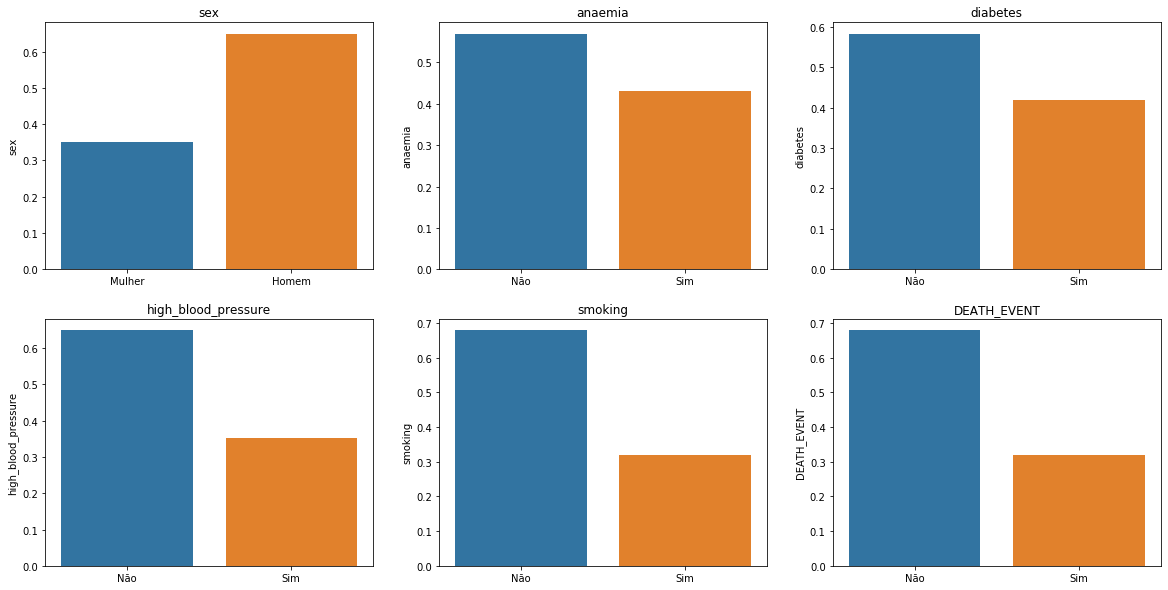

In [27]:
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.barplot(dados.sex.value_counts(True).index, dados.sex.value_counts(True)).set_title('sex')

plt.subplot(2,3,2)
sns.barplot(dados.anaemia.value_counts(True).index, dados.anaemia.value_counts(True)).set_title('anaemia')

plt.subplot(2,3,3)
sns.barplot(dados.diabetes.value_counts(True).index, dados.diabetes.value_counts(True)).set_title('diabetes')

plt.subplot(2,3,4)
sns.barplot(dados.high_blood_pressure.value_counts(True).index, dados.high_blood_pressure.value_counts(True)).set_title('high_blood_pressure')

plt.subplot(2,3,5)
sns.barplot(dados.smoking.value_counts(True).index, dados.smoking.value_counts(True)).set_title('smoking')

plt.subplot(2,3,6)
sns.barplot(dados.DEATH_EVENT.value_counts(True).index, dados.DEATH_EVENT.value_counts(True)).set_title('DEATH_EVENT')

plt.show()

In [28]:
# ANAEMIA
anaemia_sobrevivente = dados.loc[sobrevivente, ['anaemia']]
anaemia_nao_sobrevivente = dados.loc[nao_sobrevivente, ['anaemia']]

# DIABETES
diabetes_sobrevivente = dados.loc[sobrevivente, ['diabetes']]
diabetes_nao_sobrevivente = dados.loc[nao_sobrevivente, ['diabetes']]

# HIGH BLOOD PRESSURE
hbp_sobrevivente = dados.loc[sobrevivente, ['high_blood_pressure']]
hbp_nao_sobrevivente = dados.loc[nao_sobrevivente, ['high_blood_pressure']]

# SMOKING
smoking_sobrevivente = dados.loc[sobrevivente, ['smoking']]
smoking_nao_sobrevivente = dados.loc[nao_sobrevivente, ['smoking']]

# SEX
sex_sobrevivente = dados.loc[sobrevivente, ['sex']]
sex_nao_sobrevivente = dados.loc[nao_sobrevivente, ['sex']]

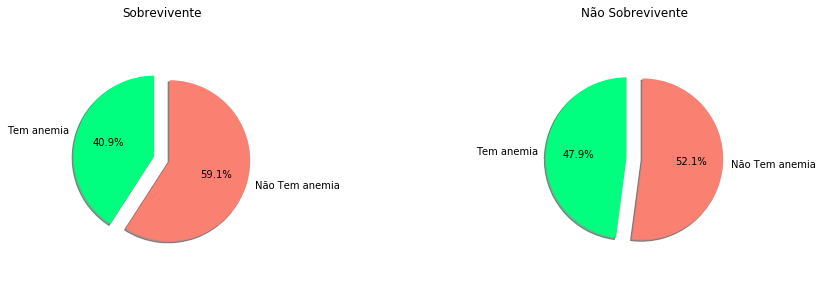

In [29]:
plt.figure(figsize=(12, 5))


#SOBREVIVENTE
labels = ['Tem anemia', 'Não Tem anemia']
titulos = [anaemia_sobrevivente['anaemia'].value_counts(True)[1]*100, anaemia_sobrevivente['anaemia'].value_counts(True)[0]*100]
cores = ['springgreen', 'salmon']
explode = (0.1, 0.1)  
total = sum(titulos)

plt.subplot(131)
plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

plt.axis('equal') 
plt.title('Sobrevivente')

#NÃO SOBREVIVENTE
labels = ['Tem anemia', 'Não Tem anemia']
titulos = [anaemia_nao_sobrevivente['anaemia'].value_counts(True)[1]*100, anaemia_nao_sobrevivente['anaemia'].value_counts(True)[0]*100]
cores = ['springgreen', 'salmon']
explode = (0.1, 0.1)  
total = sum(titulos)

plt.subplot(133)
plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

plt.axis('equal') 
plt.title('Não Sobrevivente')


plt.show()

Observando o gráfico, percebe-se que entre os pacientes que não sobreviveram, o índice de anêmicos é em torno de 7% maior do que nos pacientes que sobreviveram.
Entretanto, ser anêmico ou não, parece não influenciar diretamente a morte do paciente.

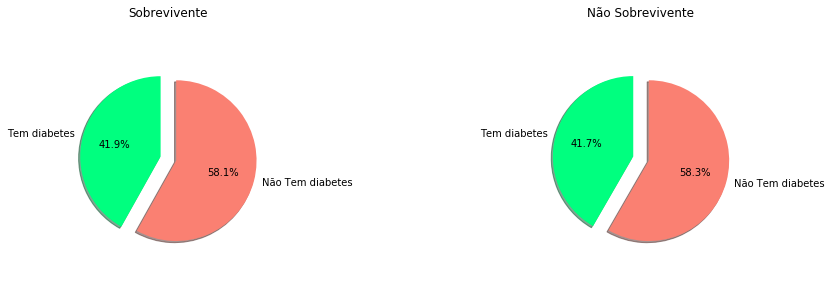

In [30]:
plt.figure(figsize=(12, 5))


#SOBREVIVENTE
labels = ['Tem diabetes', 'Não Tem diabetes']
titulos = [diabetes_sobrevivente['diabetes'].value_counts(True)[1]*100, diabetes_sobrevivente['diabetes'].value_counts(True)[0]*100]
cores = ['springgreen', 'salmon']
explode = (0.1, 0.1)  
total = sum(titulos)

plt.subplot(131)
plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

plt.axis('equal') 
plt.title('Sobrevivente')

#NÃO SOBREVIVENTE
labels = ['Tem diabetes', 'Não Tem diabetes']
titulos = [diabetes_nao_sobrevivente['diabetes'].value_counts(True)[1]*100, diabetes_nao_sobrevivente['diabetes'].value_counts(True)[0]*100]
cores = ['springgreen', 'salmon']
explode = (0.1, 0.1)  
total = sum(titulos)

plt.subplot(133)
plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

plt.axis('equal') 
plt.title('Não Sobrevivente')


plt.show()

Pelo gráfico, observa-se que entre os pacientes que não sobreviveram, o índice de diabéticos é ligeiramente maior do que nos pacientes que sobreviveram.
Logo, ser diabético ou não, parece não influenciar diretamente a morte do paciente.

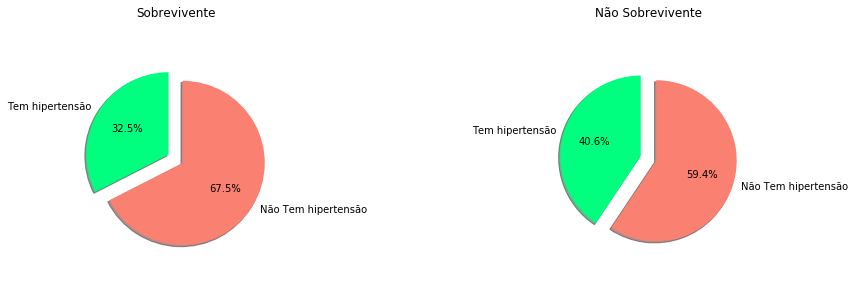

In [31]:
plt.figure(figsize=(12, 5))


#SOBREVIVENTE
labels = ['Tem hipertensão', 'Não Tem hipertensão']
titulos = [hbp_sobrevivente['high_blood_pressure'].value_counts(True)[1]*100, hbp_sobrevivente['high_blood_pressure'].value_counts(True)[0]*100]
cores = ['springgreen', 'salmon']
explode = (0.1, 0.1)  
total = sum(titulos)

plt.subplot(131)
plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

plt.axis('equal') 
plt.title('Sobrevivente')

#NÃO SOBREVIVENTE
labels = ['Tem hipertensão', 'Não Tem hipertensão']
titulos = [hbp_nao_sobrevivente['high_blood_pressure'].value_counts(True)[1]*100, hbp_nao_sobrevivente['high_blood_pressure'].value_counts(True)[0]*100]
cores = ['springgreen', 'salmon']
explode = (0.1, 0.1)  
total = sum(titulos)

plt.subplot(133)
plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

plt.axis('equal') 
plt.title('Não Sobrevivente')


plt.show()

Observando o gráfico, é possível inferir que entre os pacientes que não sobreviveram, o índice de hipertensos é 8% maior do que nos pacientes que sobreviveram.
Logo, ser hipertenso ou não, já parece influenciar um pouco mais na morte do paciente.

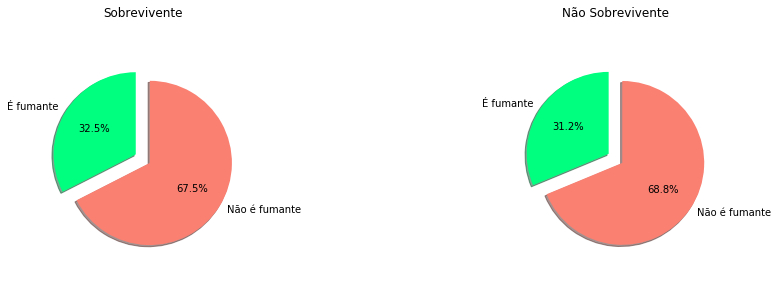

In [32]:
plt.figure(figsize=(12, 5))


#SOBREVIVENTE
labels = ['É fumante', 'Não é fumante']
titulos = [smoking_sobrevivente['smoking'].value_counts(True)[1]*100, smoking_sobrevivente['smoking'].value_counts(True)[0]*100]
cores = ['springgreen', 'salmon']
explode = (0.1, 0.1)  
total = sum(titulos)

plt.subplot(131)
plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

plt.axis('equal') 
plt.title('Sobrevivente')

#NÃO SOBREVIVENTE
labels = ['É fumante', 'Não é fumante']
titulos = [smoking_nao_sobrevivente['smoking'].value_counts(True)[1]*100, smoking_nao_sobrevivente['smoking'].value_counts(True)[0]*100]
cores = ['springgreen', 'salmon']
explode = (0.1, 0.1)  
total = sum(titulos)

plt.subplot(133)
plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

plt.axis('equal') 
plt.title('Não Sobrevivente')


plt.show()

Assim como diabetes, a diferença é muito baixa.

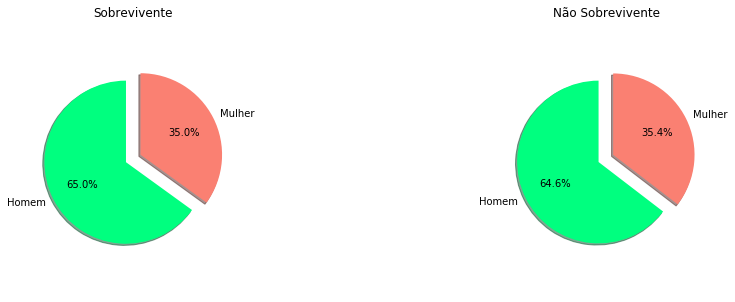

In [33]:
plt.figure(figsize=(12, 5))


#SOBREVIVENTE
labels = ['Homem', 'Mulher']
titulos = [sex_sobrevivente['sex'].value_counts(True)[1]*100, sex_sobrevivente['sex'].value_counts(True)[0]*100]
cores = ['springgreen', 'salmon']
explode = (0.1, 0.1)  
total = sum(titulos)

plt.subplot(131)
plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

plt.axis('equal') 
plt.title('Sobrevivente')

#NÃO SOBREVIVENTE
labels = ['Homem', 'Mulher']
titulos = [sex_nao_sobrevivente['sex'].value_counts(True)[1]*100, sex_nao_sobrevivente['sex'].value_counts(True)[0]*100]
cores = ['springgreen', 'salmon']
explode = (0.1, 0.1)  
total = sum(titulos)

plt.subplot(133)
plt.pie(titulos, explode = explode, labels = labels, colors = cores, autopct = '%1.1f%%', shadow = True, startangle=90)

plt.axis('equal') 
plt.title('Não Sobrevivente')


plt.show()

Assim como ser fumante e diabético, o gênero parece não influenciar diretamente.

___
## Modelos probabilísticos


##### Separando os dados em Treinamento e Teste

In [34]:
dados_com_numeros = pd.read_excel(filename)
dados_com_numeros

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [35]:
# Criando uma variável que contém as features
lista_colunas = list(dados_com_numeros.columns)
lista_colunas.remove('DEATH_EVENT')

X = dados_com_numeros.loc[:, lista_colunas]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [36]:
# Criando uma variável que contém o target
y = dados_com_numeros['DEATH_EVENT']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [37]:
# Separando aleatoriamente os dados do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

*Treinamento*

In [38]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
101,75,0,582,0,45,1,263358.03,1.18,137,1,0,87
69,65,0,113,1,25,0,497000.00,1.83,135,1,0,67
31,85,0,23,0,45,0,360000.00,3.00,132,1,0,28
172,70,1,171,0,60,1,176000.00,1.10,145,1,1,146
148,75,1,582,0,30,0,225000.00,1.83,134,1,0,113


In [39]:
y_train.head()

101    0
69     1
31     1
172    0
148    1
Name: DEATH_EVENT, dtype: int64

In [40]:
# Juntando a tabela dos features e target para o Treinamento
train = X_train.join(y_train, how = 'inner')
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
101,75,0,582,0,45,1,263358.03,1.18,137,1,0,87,0
69,65,0,113,1,25,0,497000.00,1.83,135,1,0,67,1
31,85,0,23,0,45,0,360000.00,3.00,132,1,0,28,1
172,70,1,171,0,60,1,176000.00,1.10,145,1,1,146,0
148,75,1,582,0,30,0,225000.00,1.83,134,1,0,113,1


*Teste*

In [41]:
# Features
X_test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,70,0,582,0,40,0,51000.0,2.7,136,1,1,250
265,50,1,298,0,35,0,362000.0,0.9,140,1,1,240
164,45,0,2442,1,30,0,334000.0,1.1,139,1,0,129
9,80,1,123,0,35,1,388000.0,9.4,133,1,1,10
77,42,0,102,1,40,0,237000.0,1.2,140,1,0,74


In [42]:
# Target
y_test.head()

281    0
265    0
164    1
9      1
77     0
Name: DEATH_EVENT, dtype: int64

In [43]:
# Juntando a tabela dos features e target para o Teste
test = X_test.join(y_test, how = 'inner')
test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
281,70,0,582,0,40,0,51000.0,2.7,136,1,1,250,0
265,50,1,298,0,35,0,362000.0,0.9,140,1,1,240,0
164,45,0,2442,1,30,0,334000.0,1.1,139,1,0,129,1
9,80,1,123,0,35,1,388000.0,9.4,133,1,1,10,1
77,42,0,102,1,40,0,237000.0,1.2,140,1,0,74,0


#### MODELOS PROBABILÍSTICOS

In [45]:
# Importando as bibliotecas necessárias para implementar os modelos
from sklearn import svm 
from sklearn import metrics
from sklearn.svm import SVC

# Vamos importar as bibliotecas do modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

# Vamos importar as bibliotecas do modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Vamos importar as bibliotecas  do modelo Regressão Linear
from sklearn.linear_model import LogisticRegression

###### Decision Tree

In [153]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [117]:
# Step 1: Import the model you want to use

# Step 2: Make an instance of the Model
modelo_decision_tree = DecisionTreeClassifier(max_depth = 7, random_state = 0)

# Step 3: Train the model on the data
modelo_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [118]:
# Step 4: Predict labels of unseen (test) data
previsao_decision_tree = modelo_decision_tree.predict(X_test)
previsao_decision_tree

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

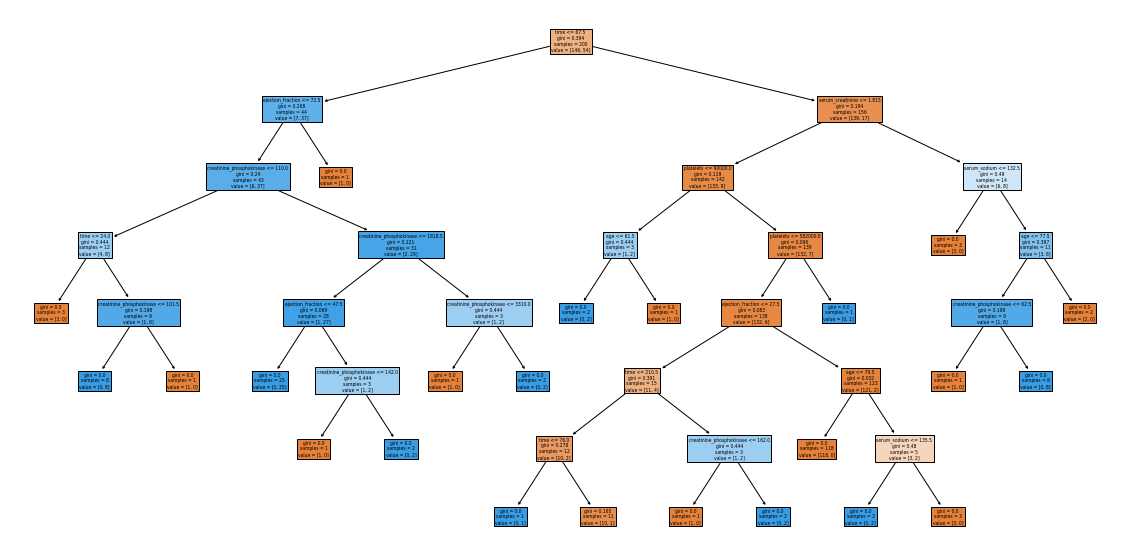

In [161]:
plt.figure(figsize = (20, 10))
target = ['Sim', 'Não']
tree.plot_tree(modelo_decision_tree, feature_names = lista_colunas, filled = True)
plt.show()

In [122]:
score = metrics.accuracy_score(previsao_decision_tree, y_test)
score

0.7272727272727273

In [152]:
confusion_matrix(y_test, previsao_decision_tree)

array([[48,  9],
       [18, 24]], dtype=int64)

In [149]:
# Tabela que mostra a comparação entre a nossa classificação e a classificação do classificador
tabela_comparativa = pd.crosstab(y_test, previsao_decision_tree, margins = True, normalize = 'index')
tabela_comparativa

col_0,0,1
DEATH_EVENT,,
0,0.842105,0.157895
1,0.428571,0.571429
All,0.666667,0.333333


Pela tabela comparativa acima, podemos perceber que o modelo de Decision Tree apresenta um número de acerto bastante cpmsiderável de 84,2% para quando o paciente sobrevive. Porém, quando analisamos os pacientes que morreram, o modelo tem apenas 57% de acerto. 

##### Random Forest

In [162]:
# Utilizando a função Random Forest com todas as features da base de dados
modelo_random_forest = RandomForestClassifier(n_estimators = 100)
modelo_random_forest.fit(X_train, y_train)
previsao_modelo_forest = modelo_random_forest.predict(X_test)

# Imprimindo valores
print('Valores dados:', list(y_test.values)) 
print('Valores previstos:', previsao_modelo_forest) 

# Observando a acurácia do nosso modelo de acordo com Random Forest
metrics.accuracy_score(previsao_modelo_forest, y_test)

Valores dados: [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
Valores previstos: [0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0]


0.7575757575757576

In [159]:
# Vamos plotar as features que são as mais importantes de acordo com o modelo do Random Forest
importancia_features = pd.Series(modelo_random_forest.feature_importances_, index = lista_colunas).sort_values(ascending=False)
importancia_features

time                        0.385811
serum_creatinine            0.157098
ejection_fraction           0.106891
platelets                   0.085108
creatinine_phosphokinase    0.076583
age                         0.071212
serum_sodium                0.056987
diabetes                    0.013893
sex                         0.013063
high_blood_pressure         0.012215
smoking                     0.010728
anaemia                     0.010410
dtype: float64

###### Regressão Logística

In [151]:
# Utilizando a função Regressão Logística com todas as features da base de dados
modelo_regressao_logistica = LogisticRegression(solver='lbfgs', multi_class='auto')
modelo_regressao_logistica.fit(X_train, y_train)
previsao_modelo_regressao_logistica = modelo_regressao_logistica.predict(X_test)

# Imprimindo valores
print('Valores dados:', list(y_test.values)) 
print('Valores previstos:', previsao_modelo_regressao_logistica) 

# Observando a acurácia do nosso modelo de acordo com Regressão Linear
metrics.accuracy_score(previsao_modelo_regressao_linear, y_test)

Valores dados [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
Valores previstos [0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1]


0.7676767676767676

In [154]:
confusion_matrix(y_test, previsao_modelo_regressao_logistica)

array([[54,  3],
       [20, 22]], dtype=int64)

In [155]:
# Tabela que mostra a comparação entre a nossa classificação e a classificação do classificador
tabela_comparativa = pd.crosstab(y_test, previsao_modelo_regressao_logistica, margins = True, normalize = 'index')
tabela_comparativa

col_0,0,1
DEATH_EVENT,,
0,0.947368,0.052632
1,0.476190,0.523810
All,0.747475,0.252525
